In [1]:
import pandas as pd
import datetime as datetime
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('COVID19_line_list_data.csv')

In [85]:
with pd.ExcelWriter('dataset1.xlsx') as writer:  
     df.to_excel(writer, sheet_name='Sheet_name_1')

In [4]:
df.shape

(1085, 27)

## Data information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 27 columns):
id                       1085 non-null int64
case_in_country          888 non-null float64
reporting date           1084 non-null object
Unnamed: 3               0 non-null float64
summary                  1080 non-null object
location                 1085 non-null object
country                  1085 non-null object
gender                   902 non-null object
age                      843 non-null float64
symptom_onset            563 non-null object
If_onset_approximated    560 non-null float64
hosp_visit_date          507 non-null object
exposure_start           128 non-null object
exposure_end             341 non-null object
visiting Wuhan           1085 non-null int64
from Wuhan               1081 non-null float64
death                    1085 non-null object
recovered                1085 non-null object
symptom                  270 non-null object
source                   108

## Removing all the unnamed columns 

In [6]:

df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace=True)

In [7]:
df.describe()

,id,case_in_country,age,If_onset_approximated,visiting Wuhan,from Wuhan
count,1085.000000,888.000000,843.000000,560.000000,1085.000000,1081.000000
mean,543.000000,48.841216,49.483689,0.042857,0.176959,0.144311
std,313.356825,78.853528,18.255334,0.202716,0.381810,0.351567
min,1.000000,1.000000,0.250000,0.000000,0.000000,0.000000
25%,272.000000,11.000000,35.000000,0.000000,0.000000,0.000000
50%,543.000000,28.000000,51.000000,0.000000,0.000000,0.000000
75%,814.000000,67.250000,64.000000,0.000000,0.000000,0.000000
max,1085.000000,1443.000000,96.000000,1.000000,1.000000,1.000000


## Removing all the rows having all null values

In [8]:
df.dropna(how='all')

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
0,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66.0,01/03/20,0.0,01/11/20,12/29/2019,01/04/20,1,0.0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
1,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56.0,1/15/2020,0.0,1/15/2020,NaN,01/12/20,0,1.0,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
2,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46.0,01/04/20,0.0,1/17/2020,NaN,01/03/20,0,1.0,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
3,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60.0,NaN,NaN,1/19/2020,NaN,NaN,1,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
4,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58.0,NaN,NaN,1/14/2020,NaN,NaN,0,0.0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1081,1082,1.0,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1082,1083,1.0,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,NaN,NaN,NaN,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...
1083,1084,1.0,2/25/2020,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,NaN,NaN,2/19/2020,2/21/2020,0,0.0,0,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...


## Cleaning 'case_in_country' column

In [9]:
df['case_in_country'].value_counts(dropna=False)


NaN      197
1.0       37
2.0       24
3.0       22
6.0       19
        ... 
147.0      1
141.0      1
135.0      1
129.0      1
136.0      1
Name: case_in_country, Length: 198, dtype: int64

## Dropping all na values

In [10]:
df.dropna(subset=['case_in_country'],inplace=True)

## Cleaning 'reporting date ' column

In [11]:
df['reporting date'].value_counts(dropna=False)

2/27/2020    91
2/20/2020    73
2/26/2020    54
2/25/2020    46
2/19/2020    42
2/21/2020    35
2/24/2020    33
2/22/2020    31
1/31/2020    28
02/08/20     26
2/23/2020    26
2/28/2020    25
02/04/20     24
02/06/20     24
1/30/2020    23
02/05/20     22
2/14/2020    21
1/29/2020    20
02/09/20     19
02/10/20     19
1/28/2020    18
2/13/2020    18
2/16/2020    16
2/17/2020    14
2/15/2020    13
1/25/2020    13
1/24/2020    13
2/18/2020    13
02/11/20     13
02/01/20     12
02/02/20     10
1/26/2020     9
1/27/2020     9
02/07/20      8
02/03/20      7
02/12/20      6
1/22/2020     5
1/21/2020     2
1/23/2020     2
1/15/2020     1
1/20/2020     1
1/13/2020     1
1/17/2020     1
NaN           1
Name: reporting date, dtype: int64

In [12]:
pd.to_datetime(df['reporting date'].astype(str), format='%m/%d/%Y',errors='coerce')

197    2020-01-25
198    2020-01-25
199    2020-01-25
200    2020-01-28
201    2020-01-29
          ...    
1080   2020-02-25
1081   2020-02-24
1082   2020-02-26
1083   2020-02-25
1084   2020-02-25
Name: reporting date, Length: 888, dtype: datetime64[ns]

In [13]:
df['reporting date'].isnull().sum()

1

In [14]:
df.dropna(subset=['reporting date'],inplace=True)

In [15]:
df

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
197,198,1.0,1/25/2020,"new confirmed COVID-19 patient in Bordeaux, Fr...",Bordeaux,France,male,48.0,1/23/2020,0.0,1/23/2020,NaN,1/22/2020,1,0.0,0,0,NaN,CNBC,https://www.cnbc.com/2020/01/25/reuters-americ...
198,199,2.0,1/25/2020,"new confirmed COVID-19 patient in Paris, Franc...",Paris,France,male,31.0,1/19/2020,0.0,1/25/2020,NaN,1/18/2020,0,1.0,0,02/12/20,NaN,CGTN,https://newseu.cgtn.com/news/2020-01-26/Corona...
199,200,3.0,1/25/2020,"new confirmed COVID-19 patient in Paris, Franc...",Paris,France,female,30.0,1/23/2020,0.0,1/25/2020,NaN,1/19/2020,0,1.0,0,02/12/20,NaN,CGTN,https://newseu.cgtn.com/news/2020-01-26/Corona...
200,201,4.0,1/28/2020,"new confirmed COVID-19 patient in Paris, Franc...",Paris,France,male,80.0,1/25/2020,1.0,1/25/2020,NaN,1/23/2020,0,1.0,2/14/2020,0,NaN,The Local,https://www.thelocal.de/20200128/number-of-ger...
201,202,5.0,1/29/2020,"new confirmed COVID-19 patient in Paris, Franc...",Paris,France,female,NaN,NaN,NaN,NaN,NaN,1/23/2020,1,0.0,0,0,NaN,The Local,https://www.thelocal.fr/20200131/coronavirus-i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,NaN,24.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1081,1082,1.0,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,NaN,35.0,NaN,NaN,NaN,NaN,NaN,0,0.0,0,0,NaN,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1082,1083,1.0,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,NaN,NaN,NaN,NaN,2/17/2020,0,0.0,0,0,NaN,South China Morning Post,https://www.scmp.com/news/china/society/articl...
1083,1084,1.0,2/25/2020,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,NaN,NaN,NaN,2/19/2020,2/21/2020,0,0.0,0,0,NaN,Reuters,https://www.reuters.com/article/us-croatia-cor...


## Cleaning 'summary' column

In [16]:
df['summary'].value_counts(dropna=False)

new confirmed COVID-19 patient in South Korea:                                                                                                                                      22
new confirmed COVID-19 patient in Germany: NRW                                                                                                                                      14
new confirmed COVID-19 patient in Iran: Qom                                                                                                                                          9
new confirmed COVID-19 patient in Kuwait: returned from Iran                                                                                                                         8
new confirmed COVID-19 patient in France: in contact with Briton who had been in Singapore and was positive                                                                          5
                                                                                     

In [17]:
df['summary'].isnull().sum()

0

## Cleaning 'location' column


In [18]:
df['location'].value_counts(dropna=False)

South Korea          112
Singapore             93
Hong Kong             80
Hokkaido              48
Thailand              41
                    ... 
Egypt                  1
Kathmandu              1
Nagano Prefecture      1
Wisconsin              1
Lyon                   1
Name: location, Length: 125, dtype: int64

In [19]:
df['location'].isnull().sum()

0

In [20]:
df.dropna(subset=['location'],inplace=True)

## Cleaning 'country' column

In [21]:
df['country'].value_counts(dropna=False)

Japan          189
South Korea    114
Hong Kong       94
Singapore       93
Germany         54
Thailand        41
France          39
Spain           34
Taiwan          34
Malaysia        23
UAE             21
UK              20
USA             18
Iran            18
Bahrain         17
Vietnam         16
Australia       15
Canada          12
Kuwait           9
Phillipines      3
India            3
Italy            3
Russia           2
Austria          2
Nepal            1
Finland          1
Lebanon          1
Sweden           1
Israel           1
Algeria          1
Croatia          1
Cambodia         1
Belgium          1
Switzerland      1
Sri Lanka        1
Egypt            1
Afghanistan      1
Name: country, dtype: int64

## Cleaning 'gender' column

In [22]:
df['gender'].value_counts(dropna=False)

male      396
female    309
NaN       182
Name: gender, dtype: int64

### Filling all na values with 'No Gender'

In [23]:
df['gender'].fillna('Gender Not known', inplace = True)

## Cleaning 'age' column

In [24]:
df['age'].value_counts(dropna=False)

NaN     234
55.0     68
65.0     48
75.0     36
45.0     36
       ... 
82.0      1
4.0       1
6.0       1
20.0      1
81.0      1
Name: age, Length: 82, dtype: int64

In [25]:
#df['age']=df['age'].astype('object')

### Filling all na values with 'No age'

In [26]:
df['age'].dropna(inplace = True)

In [27]:
#df['age'].fillna('No age', inplace = True)

In [28]:
df['age'].isnull().sum()

0

## Cleaning 'sympton_onset' column

In [29]:
df['symptom_onset'].value_counts(dropna=False)

NaN          468
1/23/2020     19
1/30/2020     19
02/03/20      18
2/16/2020     17
1/25/2020     17
1/24/2020     16
2/20/2020     16
02/01/20      15
1/28/2020     15
2/17/2020     13
02/12/20      13
2/14/2020     12
1/26/2020     12
02/06/20      11
02/04/20      11
02/02/20      11
02/08/20      11
02/10/20      10
1/29/2020     10
2/24/2020      9
2/13/2020      9
1/21/2020      9
02/07/20       8
2/19/2020      8
1/31/2020      8
1/22/2020      8
1/27/2020      8
1/20/2020      8
02/09/20       7
2/21/2020      7
2/25/2020      7
2/18/2020      7
02/11/20       6
2/23/2020      6
2/22/2020      6
2/15/2020      5
1/19/2020      4
02/05/20       4
2/26/2020      3
01/03/20       2
1/13/2020      2
1/16/2020      2
1/18/2020      2
1/14/2020      2
01/11/20       1
01/10/20       1
01/05/20       1
1/17/2020      1
1/15/2020      1
01/12/20       1
Name: symptom_onset, dtype: int64

In [30]:
df['symptom_onset'].isnull().sum()

468

In [31]:
pd.to_datetime(df['symptom_onset'].astype(str), format='%m/%d/%Y',errors='coerce')

197    2020-01-23
198    2020-01-19
199    2020-01-23
200    2020-01-25
201           NaT
          ...    
1080          NaT
1081          NaT
1082          NaT
1083          NaT
1084   2020-02-17
Name: symptom_onset, Length: 887, dtype: datetime64[ns]

### Filling all na values with 'No dates'

In [32]:
df['symptom_onset']=df['symptom_onset'].astype('object')
df['symptom_onset'].fillna('No date', inplace = True)
df['symptom_onset'].isnull().sum()

0

## Cleaning 'If_onset_approximated' column

In [33]:
df['If_onset_approximated'].value_counts(dropna=False)

NaN    469
0.0    394
1.0     24
Name: If_onset_approximated, dtype: int64

In [34]:

df['If_onset_approximated'].replace(to_replace = [0,1],  
                            value =['True','False'],inplace=True) 

### Filling all an values with 'Not approximated'

In [35]:
df['If_onset_approximated']=df['If_onset_approximated'].astype('object')
df['If_onset_approximated'].fillna('Not approximated', inplace = True)
df['If_onset_approximated'].isnull().sum()

0

## Cleaning 'hosp_visit_date' column

In [36]:
df['hosp_visit_date'].value_counts(dropna=False)

NaN          529
2/17/2020     20
02/03/20      17
02/10/20      15
1/30/2020     15
2/25/2020     14
1/23/2020     13
2/24/2020     13
02/01/20      12
2/21/2020     12
2/22/2020     12
1/25/2020     12
02/07/20      11
1/28/2020     10
02/04/20      10
1/24/2020      9
2/18/2020      9
1/31/2020      8
02/06/20       8
02/02/20       8
02/12/20       8
2/19/2020      8
2/26/2020      8
1/29/2020      8
2/13/2020      7
02/09/20       7
1/27/2020      7
2/20/2020      6
02/05/20       6
1/26/2020      6
1/19/2020      6
2/23/2020      6
2/14/2020      5
02/11/20       5
02/08/20       5
2/15/2020      5
1/22/2020      4
2/16/2020      4
1/21/2020      3
1/13/2020      3
2/27/2020      2
1/20/2020      2
1/17/2020      2
2/22/20        1
1/16/2020      1
2/28/2020      1
2//2020        1
01/08/20       1
01/06/20       1
1/15/2020      1
Name: hosp_visit_date, dtype: int64

In [37]:
pd.to_datetime(df['hosp_visit_date'].astype(str), format='%m/%d/%Y',errors='coerce')

197    2020-01-23
198    2020-01-25
199    2020-01-25
200    2020-01-25
201           NaT
          ...    
1080          NaT
1081          NaT
1082          NaT
1083          NaT
1084          NaT
Name: hosp_visit_date, Length: 887, dtype: datetime64[ns]

### Filling all na values with 'No dates'

In [38]:
df['hosp_visit_date']=df['hosp_visit_date'].astype('object')
df['hosp_visit_date'].fillna('No date', inplace = True)
df['hosp_visit_date'].isnull().sum()

0

## Cleaning 'exposure_start' column

In [39]:
df['exposure_start'].value_counts(dropna=False)

NaN           793
1/26/2020      14
1/24/2020      12
1/20/2020       7
1/25/2020       7
1/23/2020       6
1/22/2020       6
2/19/2020       5
1/19/2020       3
2/15/2020       3
1/13/2020       3
1/18/2020       3
1/21/2020       3
1/27/2020       2
01/10/20        2
02/12/20        2
1/17/2020       2
1/15/2020       1
1/28/2020       1
1/30/2020       1
2/17/2020       1
2/20/2020       1
2/21/2020       1
02/10/20        1
01/11/20        1
1/16/2020       1
02/04/20        1
02/11/20        1
01/12/20        1
01/08/20        1
12/24/2019      1
Name: exposure_start, dtype: int64

In [40]:
pd.to_datetime(df['exposure_start'].astype(str), format='%m/%d/%Y',errors='coerce')

197           NaT
198           NaT
199           NaT
200           NaT
201           NaT
          ...    
1080          NaT
1081          NaT
1082          NaT
1083   2020-02-19
1084   2020-02-15
Name: exposure_start, Length: 887, dtype: datetime64[ns]

### Filling all na values with 'No dates'

In [41]:
df['exposure_start']=df['exposure_start'].astype('object')
df['exposure_start'].fillna('No date', inplace = True)
df['exposure_start'].isnull().sum()

0

## Cleaning 'exposure_end' column

In [42]:
df['exposure_end'].value_counts(dropna=False)

NaN          660
1/22/2020     25
1/21/2020     17
1/23/2020     17
1/28/2020     15
1/26/2020     14
1/19/2020     12
1/20/2020     12
1/30/2020     10
2/21/2020      9
1/31/2020      8
1/24/2020      6
1/18/2020      6
1/13/2020      6
02/04/20       5
1/16/2020      5
1/17/2020      5
1/27/2020      4
02/02/20       4
1/25/2020      4
2/22/2020      4
2/20/2020      3
2/15/2020      3
02/01/20       3
02/07/20       3
02/03/20       3
2/19/2020      3
2/17/2020      2
2/18/2020      2
1/15/2020      2
1/29/2020      2
02/09/20       2
2/23/2020      2
01/10/20       1
2/25/2020      1
2/16/2020      1
2/24/2020      1
2/13/2020      1
02/08/20       1
01/08/20       1
01/06/20       1
02/05/20       1
Name: exposure_end, dtype: int64

In [43]:
pd.to_datetime(df['exposure_end'].astype(str), format='%m/%d/%Y',errors='coerce')

197    2020-01-22
198    2020-01-18
199    2020-01-19
200    2020-01-23
201    2020-01-23
          ...    
1080          NaT
1081          NaT
1082   2020-02-17
1083   2020-02-21
1084   2020-02-15
Name: exposure_end, Length: 887, dtype: datetime64[ns]

### Filling all na values with 'No dates'

In [44]:
df['exposure_end']=df['exposure_end'].astype('object')
df['exposure_end'].fillna('No date', inplace = True)
df['exposure_end'].isnull().sum()

0

## Cleaning 'visiting Wuhan' column

In [45]:
df['visiting Wuhan'].value_counts(dropna=False)

0    780
1    107
Name: visiting Wuhan, dtype: int64

## Cleaning 'from_Wuhan' column

In [46]:
df['from Wuhan'].value_counts(dropna=False)

0.0    813
1.0     74
Name: from Wuhan, dtype: int64

In [47]:
df['from Wuhan']=df['from Wuhan'].astype('object')

## Cleaning 'death' column 

In [48]:
df['death'].value_counts(dropna=False)

0            863
2/23/2020      4
2/26/2020      3
1              3
2/19/2020      2
2/21/2020      2
2/27/2020      2
2/25/2020      2
2/22/2020      1
2/13/2020      1
2/14/2020      1
2/24/2020      1
02/01/20       1
2/28/2020      1
Name: death, dtype: int64

In [49]:
pd.to_datetime(df['death'].astype(str), format='%m/%d/%Y',errors='coerce')
df['death'].replace(to_replace =["0", "1"],  
                            value ="No Date",inplace=True) 

### Filling all na with 'No dates'

In [50]:
df['death']=df['death'].astype('object')
df['death'].fillna('No date', inplace = True)
df['death'].isnull().sum()

0

## Cleaning 'recovered' column

In [51]:
df['recovered'].value_counts(dropna=False)

0             731
2/19/2020      13
2/18/2020      13
12/30/1899     12
02/12/20       11
2/21/2020      10
2/20/2020       9
2/15/2020       9
2/14/2020       8
2/17/2020       7
2/24/2020       7
02/09/20        6
2/26/2020       6
2/27/2020       5
2/25/2020       5
1               4
02/06/20        4
02/04/20        4
2/22/2020       3
02/11/20        3
2/16/2020       3
1/30/2020       2
02/05/20        2
02/08/20        2
2/23/2020       1
1/17/2020       1
02/02/20        1
1/31/2020       1
02/07/20        1
2/28/2020       1
1/15/2020       1
2/13/2020       1
Name: recovered, dtype: int64

In [52]:
pd.to_datetime(df['recovered'].astype(str), format='%m/%d/%Y',errors='coerce')
df['recovered'].replace(to_replace =["0", "1"],  
                            value ="No Date",inplace=True) 

### Filling all na with 'No dates'

In [53]:
df['recovered']=df['recovered'].astype('object')
df['recovered'].fillna('No date', inplace = True)
df['recovered'].isnull().sum()

0

## Cleaning 'symptom' column

In [54]:
df['symptom'].value_counts(dropna=False)

NaN                                      620
fever                                     72
fever, cough                              36
cough                                     14
fever, malaise                             7
                                        ... 
malaise, fever, headache                   1
fatigue, loss of appetite                  1
fatigue, joint pain, fever                 1
mild cough, sputum, throat discomfort      1
fatigue, difficulty breathing              1
Name: symptom, Length: 108, dtype: int64

### Filling all na with 'Not identified'

In [55]:
 df['symptom'].fillna("Not identified", inplace = True) 
df['symptom'].isnull().sum()
                           

0

## Cleaning 'source' column

In [56]:
df['source'].value_counts(dropna=False)

Ministry of Health              178
KCDC                            103
Ministry of Health Singapore     67
Government HK                    60
Channel News Asia                51
                               ... 
US News                           1
Fortune                           1
HBL                               1
SBS                               1
Channel 3000                      1
Name: source, Length: 74, dtype: int64

In [57]:
df['source'].isnull().sum()

0

## Cleaning 'link' column

In [58]:
df['link'].value_counts(dropna=False)

https://www.mhlw.go.jp/stf/houdou/houdou_list_202002.html                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          87
https://www.mhlw.go.jp/stf/newpage_09713.html                                                                                                                                                     

In [59]:
df['link'].isnull().sum()

0

# cleansed data

In [60]:
df

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
197,198,1.0,1/25/2020,"new confirmed COVID-19 patient in Bordeaux, Fr...",Bordeaux,France,male,48.0,1/23/2020,True,1/23/2020,No date,1/22/2020,1,0,No Date,No Date,Not identified,CNBC,https://www.cnbc.com/2020/01/25/reuters-americ...
198,199,2.0,1/25/2020,"new confirmed COVID-19 patient in Paris, Franc...",Paris,France,male,31.0,1/19/2020,True,1/25/2020,No date,1/18/2020,0,1,No Date,02/12/20,Not identified,CGTN,https://newseu.cgtn.com/news/2020-01-26/Corona...
199,200,3.0,1/25/2020,"new confirmed COVID-19 patient in Paris, Franc...",Paris,France,female,30.0,1/23/2020,True,1/25/2020,No date,1/19/2020,0,1,No Date,02/12/20,Not identified,CGTN,https://newseu.cgtn.com/news/2020-01-26/Corona...
200,201,4.0,1/28/2020,"new confirmed COVID-19 patient in Paris, Franc...",Paris,France,male,80.0,1/25/2020,False,1/25/2020,No date,1/23/2020,0,1,2/14/2020,No Date,Not identified,The Local,https://www.thelocal.de/20200128/number-of-ger...
201,202,5.0,1/29/2020,"new confirmed COVID-19 patient in Paris, Franc...",Paris,France,female,NaN,No date,Not approximated,No date,No date,1/23/2020,1,0,No Date,No Date,Not identified,The Local,https://www.thelocal.fr/20200131/coronavirus-i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,1081,2.0,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,Gender Not known,24.0,No date,Not approximated,No date,No date,No date,0,0,No Date,No Date,Not identified,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1081,1082,1.0,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,Gender Not known,35.0,No date,Not approximated,No date,No date,No date,0,0,No Date,No Date,Not identified,Fox News,https://www.foxnews.com/health/afghanistan-fir...
1082,1083,1.0,2/26/2020,new COVID-19 patient confirmed in Algeria: mal...,Algeria,Algeria,male,NaN,No date,Not approximated,No date,No date,2/17/2020,0,0,No Date,No Date,Not identified,South China Morning Post,https://www.scmp.com/news/china/society/articl...
1083,1084,1.0,2/25/2020,new COVID-19 patient confirmed in Croatia: mal...,Croatia,Croatia,male,NaN,No date,Not approximated,No date,2/19/2020,2/21/2020,0,0,No Date,No Date,Not identified,Reuters,https://www.reuters.com/article/us-croatia-cor...


In [61]:
df['case_in_country'].astype('int')

197     1
198     2
199     3
200     4
201     5
       ..
1080    2
1081    1
1082    1
1083    1
1084    1
Name: case_in_country, Length: 887, dtype: int32

In [62]:
df.dropna(inplace=True)

In [63]:
df

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
197,198,1.0,1/25/2020,"new confirmed COVID-19 patient in Bordeaux, Fr...",Bordeaux,France,male,48.0,1/23/2020,True,1/23/2020,No date,1/22/2020,1,0,No Date,No Date,Not identified,CNBC,https://www.cnbc.com/2020/01/25/reuters-americ...
198,199,2.0,1/25/2020,"new confirmed COVID-19 patient in Paris, Franc...",Paris,France,male,31.0,1/19/2020,True,1/25/2020,No date,1/18/2020,0,1,No Date,02/12/20,Not identified,CGTN,https://newseu.cgtn.com/news/2020-01-26/Corona...
199,200,3.0,1/25/2020,"new confirmed COVID-19 patient in Paris, Franc...",Paris,France,female,30.0,1/23/2020,True,1/25/2020,No date,1/19/2020,0,1,No Date,02/12/20,Not identified,CGTN,https://newseu.cgtn.com/news/2020-01-26/Corona...
200,201,4.0,1/28/2020,"new confirmed COVID-19 patient in Paris, Franc...",Paris,France,male,80.0,1/25/2020,False,1/25/2020,No date,1/23/2020,0,1,2/14/2020,No Date,Not identified,The Local,https://www.thelocal.de/20200128/number-of-ger...
203,204,7.0,02/08/20,"new confirmed COVID-19 patient in France: 9, i...",France,France,Gender Not known,9.0,No date,Not approximated,No date,1/24/2020,1/28/2020,0,0,No Date,No Date,Not identified,Bloomberg,https://www.bloomberg.com/news/articles/2020-0...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1052,1053,1.0,2/21/2020,new confirmed COVID-19 patient in Lebanon: fem...,Lebanon,Lebanon,female,45.0,No date,Not approximated,No date,No date,2/20/2020,0,0,No Date,No Date,Not identified,US News,https://www.usnews.com/news/world/articles/202...
1079,1080,1.0,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,Gender Not known,24.0,No date,Not approximated,No date,No date,No date,0,0,No Date,No Date,Not identified,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1080,1081,2.0,2/25/2020,"new COVID-19 patient confirmed in Austria: 24,...",Innsbruck,Austria,Gender Not known,24.0,No date,Not approximated,No date,No date,No date,0,0,No Date,No Date,Not identified,Jakarta Post,https://www.thejakartapost.com/news/2020/02/25...
1081,1082,1.0,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,Gender Not known,35.0,No date,Not approximated,No date,No date,No date,0,0,No Date,No Date,Not identified,Fox News,https://www.foxnews.com/health/afghanistan-fir...


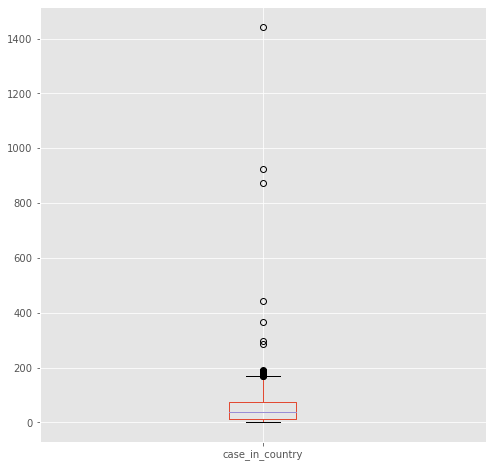

In [64]:
df['case_in_country'].plot(kind='box',figsize=(8,8))

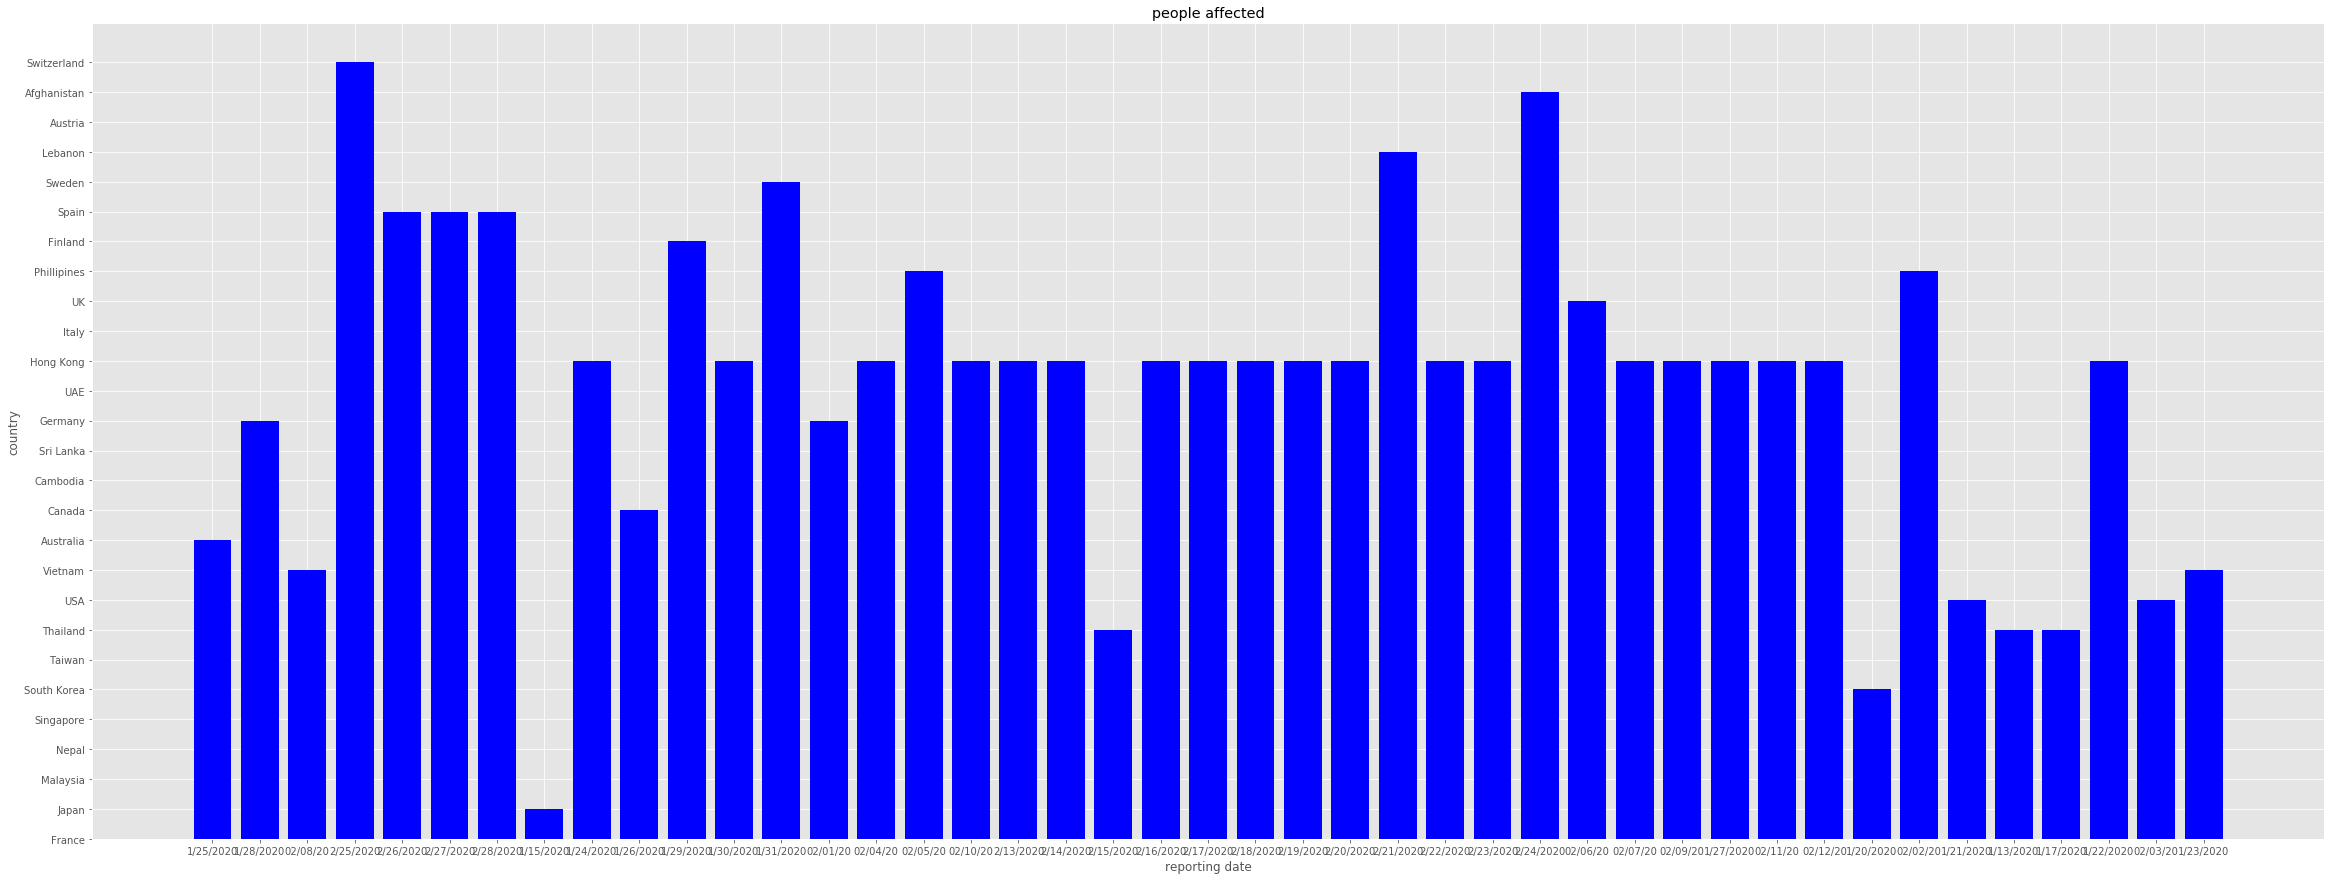

In [65]:
fig, ax = plt.subplots(figsize=(40, 15))

# Add x-axis and y-axis
ax.bar(df['reporting date'],
        df['country'],
        color='blue')

# Set title and labels for axes
ax.set(xlabel="reporting date",
       ylabel="country",
       title="people affected")

plt.show()

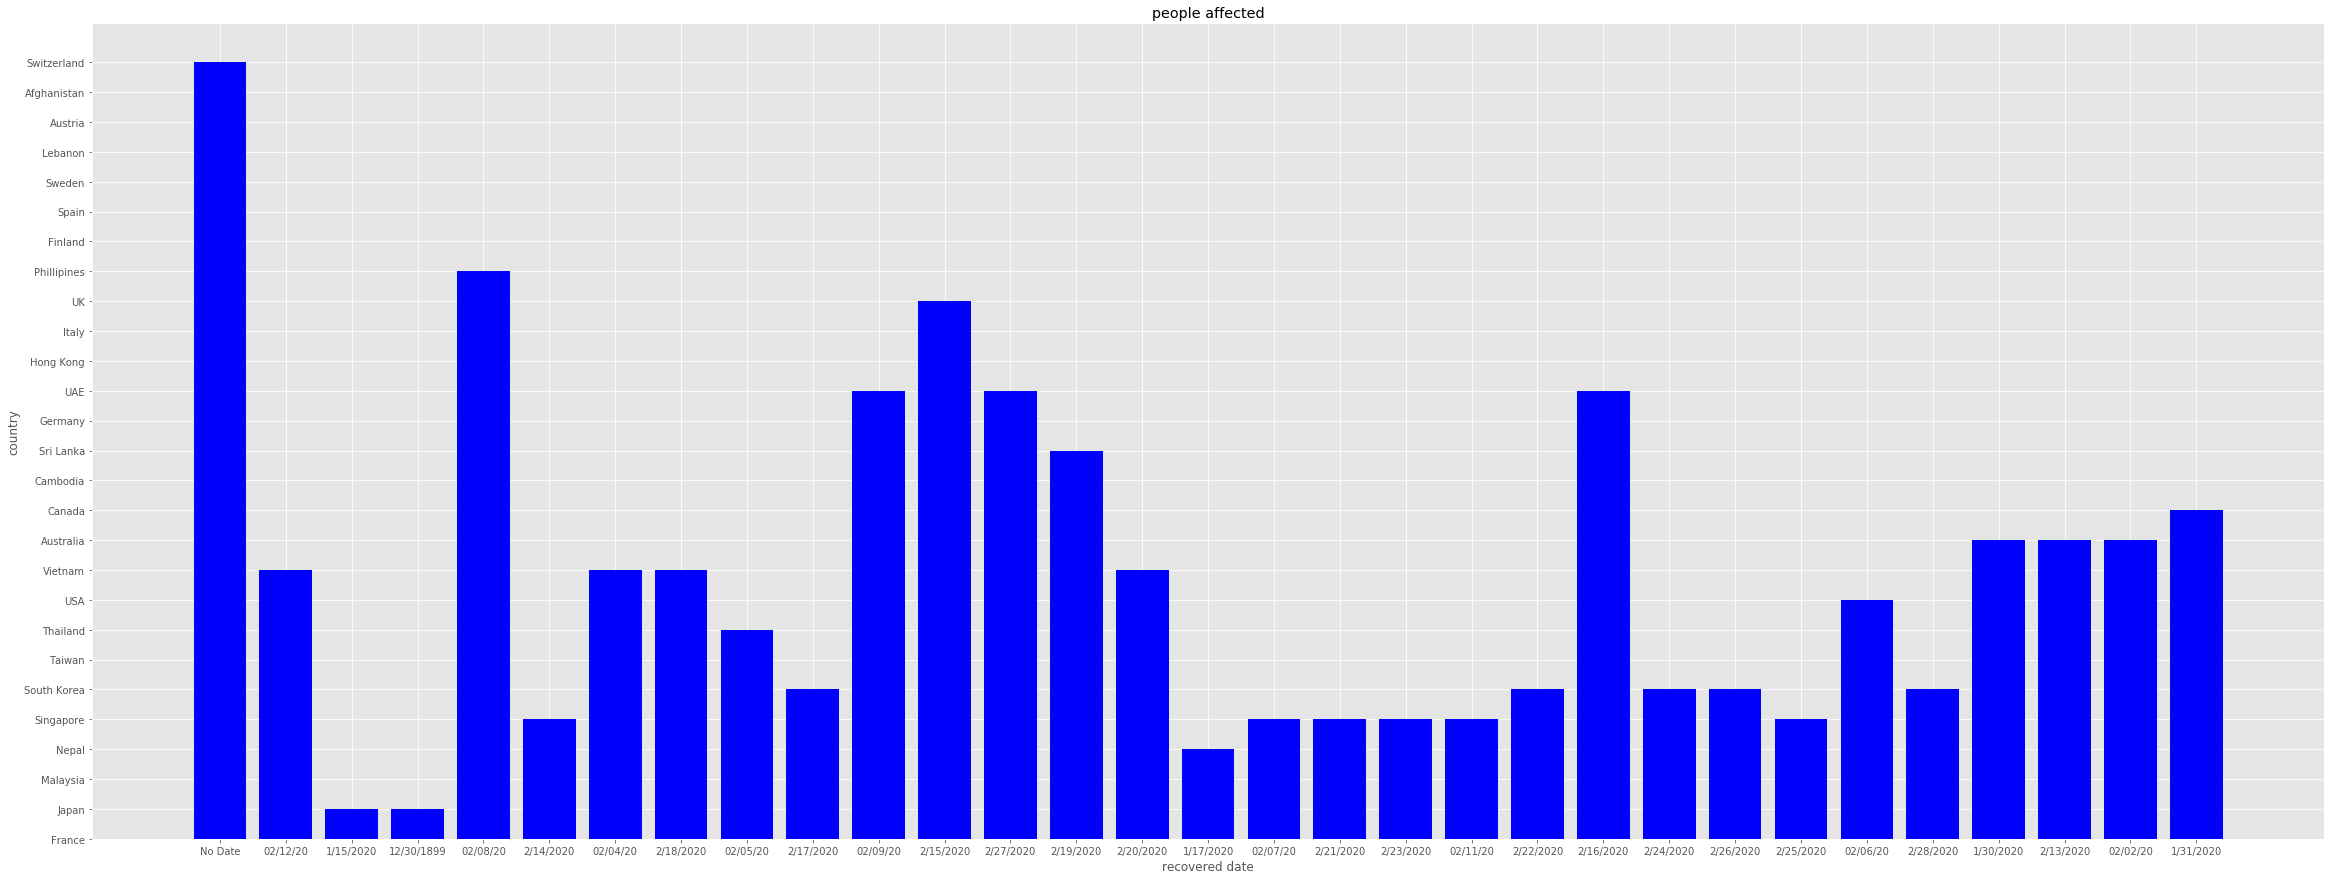

In [66]:
fig, ax = plt.subplots(figsize=(40, 15))

# Add x-axis and y-axis
ax.bar(df['recovered'],
        df['country'],
        color='blue')

# Set title and labels for axes
ax.set(xlabel="recovered date",
       ylabel="country",
       title="people affected")

plt.show()

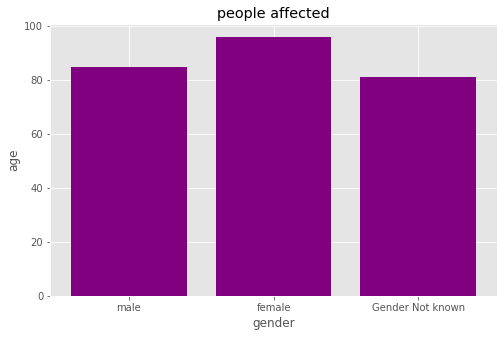

In [67]:
fig, ax = plt.subplots(figsize=(8,5))

# Add x-axis and y-axis
ax.bar(df['gender'],
        df['age'],
        color='purple'
       )

# Set title and labels for axes
ax.set(xlabel="gender",
       ylabel="age",
       title="people affected"
      )

plt.show()

In [68]:
list1=['02/06/20','02/05/20','02/09/20','02/04/20','02/08/20','02/10/20 ','02/11/20 ',
       '02/01/20','02/02/20','02/07/20','02/12/20','02/03/20']
list2=['02/06/2020','02/05/2020','02/09/2020','02/04/2020','02/08/2020','02/10/2020',
       '02/11/2020','02/01/2020','02/02/2020','02/07/2020','02/12/2020','02/03/2020']

In [69]:
df.replace(to_replace = list1, 
                 value = list2, inplace=True) 


In [70]:
list3 = ['02/10/20','02/11/20','01/03/20','01/10/20','01/05/20','01/11/20']

In [71]:
list4 = ['2/10/2020','2/11/2020','1/03/2020','1/10/2020','1/05/2020','1/11/2020']

In [72]:
df.replace(to_replace = list3, 
                 value = list4, inplace=True) 

In [73]:
list5 = ['02/10/20','02/11/20','01/06/20','2/22/20']
list6 = ['2/10/2020','2/11/2020','1/06/2020','2/22/2020']

In [74]:
df.replace(to_replace = list5, 
                 value = list6, inplace=True) 
df['hosp_visit_date'].replace(to_replace = '2//2020', 
                 value = 'No date', inplace=True)

In [75]:
list9 = ['01/08/20','01/12/20']
list10 = ['01/08/2020','01/12/2020']
df.replace(to_replace = list9, 
                 value = list10, inplace=True)

In [76]:
df.drop( df[df['recovered'] == '12/30/1899' ].index , inplace=True)

In [77]:
df.sort_values('case_in_country',ascending=True,inplace=True)


In [78]:
df

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
197,198,1.0,1/25/2020,"new confirmed COVID-19 patient in Bordeaux, Fr...",Bordeaux,France,male,48.0,1/23/2020,True,1/23/2020,No date,1/22/2020,1,0.0,No Date,No Date,Not identified,CNBC,https://www.cnbc.com/2020/01/25/reuters-americ...
450,451,1.0,1/24/2020,new confirmed COVID-19 patient in Singapore: 1...,Singapore,Singapore,male,66.0,1/21/2020,True,1/22/2020,No date,1/20/2020,0,1.0,No Date,2/19/2020,Not identified,Channel News Asia,https://www.channelnewsasia.com/news/singapore...
543,544,1.0,1/20/2020,new confirmed COVID-19 patient in South Korea:...,South Korea,South Korea,female,35.0,1/18/2020,True,1/19/2020,No date,1/19/2020,0,1.0,No Date,02/06/2020,"high fever, chills, muscle pain",Nikkei Asian Review,https://asia.nikkei.com/Spotlight/Coronavirus-...
1081,1082,1.0,2/24/2020,new COVID-19 patient confirmed in Afghanistan:...,Afghanistan,Afghanistan,Gender Not known,35.0,No date,Not approximated,No date,No date,No date,0,0.0,No Date,No Date,Not identified,Fox News,https://www.foxnews.com/health/afghanistan-fir...
657,658,1.0,1/21/2020,new confirmed COVID-19 patient in Taiwan: fema...,Taiwan,Taiwan,female,55.0,1/11/2020,True,1/20/2020,No date,1/20/2020,1,0.0,No Date,No Date,"fever, cough, shortness of breath",Taiwan News,https://www.taiwannews.com.tw/en/news/3866002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,653,365.0,2/22/2020,new confirmed COVID-19 patient in South Korea:...,South Korea,South Korea,male,62.0,02/02/2020,True,02/05/2020,No date,No date,0,0.0,No Date,No Date,Not identified,KCDC,https://www.cdc.go.kr/board/board.es?mid=a3040...
653,654,443.0,2/23/2020,new confirmed COVID-19 patient in South Korea:...,South Korea,South Korea,male,41.0,No date,Not approximated,No date,No date,No date,0,0.0,2/22/2020,No Date,Not identified,KCDC,https://www.cdc.go.kr/board/board.es?mid=a3040...
654,655,875.0,2/23/2020,new confirmed COVID-19 patient in South Korea:...,South Korea,South Korea,male,36.0,No date,Not approximated,No date,No date,No date,0,0.0,2/25/2020,No Date,Not identified,KCDC,https://www.cdc.go.kr/board/board.es?mid=a3040...
655,656,925.0,2/25/2020,new confirmed COVID-19 patient in South Korea:...,South Korea,South Korea,female,69.0,No date,Not approximated,No date,No date,No date,0,0.0,No Date,No Date,Not identified,KCDC,https://www.cdc.go.kr/board/board.es?mid=a3040...


In [84]:
df.to_excel("dataset1.xlsx",sheet_name='Sheet_name_1')